##Import Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

##Read .csv dataset from 'USD_INR' using pandas

Reverse the data, because the data sorted by descending

In [ ]:
df = pd.read_csv('USD_INR.csv', index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
print(df)

             Price    Open    High     Low  Change %
Date                                                
1980-01-02   8.000   8.000   8.000   8.000      0.00
1980-01-03   7.950   7.950   7.950   7.950     -0.63
1980-01-04   8.050   8.050   8.050   8.050      1.26
1980-01-07   8.050   8.050   8.050   8.050      0.00
1980-01-08   8.050   8.050   8.050   8.050      0.00
...            ...     ...     ...     ...       ...
2017-08-04  63.675  63.670  63.786  63.572     -0.05
2017-08-07  63.840  63.710  63.865  63.648      0.26
2017-08-08  63.692  63.750  63.785  63.615     -0.23
2017-08-09  63.860  63.780  63.860  63.710      0.26
2017-08-10  64.165  63.898  64.175  63.855      0.48

[9697 rows x 5 columns]


**Visualize Dataset between Date and Price**

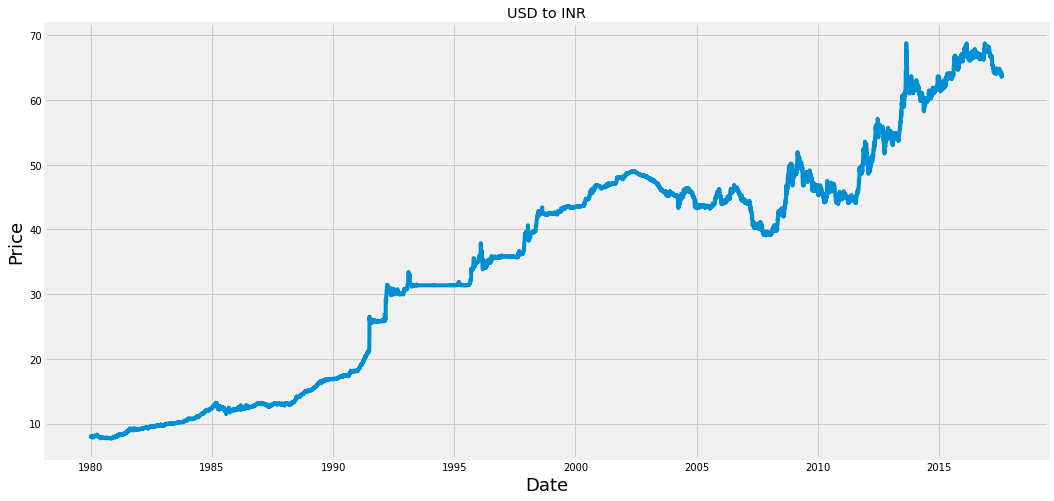

In [ ]:
plt.figure(figsize=(16,8))
plt.title("USD to INR")
plt.plot(df['Price'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()

**Take Value to Predict with LSTM**

In [ ]:
data = df.filter(['Price'])
dataset = data.values

##Split data with 20% test data and 80% training data

In [ ]:
split = int(len(dataset) * 0.8)
train_dataset =  dataset[:split]
test_dataset = dataset[split:]

Pre-Processing atribute [ Price ] Using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:split,:]
x_train = []
y_train = []

##Preparing the LSTM Model for training data

Build 3 dimensions for LSTM Model. Predict data from 50 days before



In [ ]:
Learning_data = 50

In [ ]:
#We predict 'price' by learning from 10 data behind
for i in range(Learning_data, len(train_data)):
  x_train.append(train_data[i-Learning_data:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##LSTM Model

LSTM (Long Short Term Memory) is a type of Recurrent Neural Network (RNN) where modifications are made to the RNN by adding a memory cell that can store information for a long period of time. It's work by learning the data behind

Using keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.LSTM(50, return_sequences = False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

 .fit to Training the data

In [ ]:
model.fit(x_train, y_train, batch_size = 3, epochs=1)

2569/2569 [==============================] - 62s 23ms/step - loss: 0.0025


##Preparing for the test data

In [ ]:
#Test data is used to predict the price

test_data = scaled_data[split - Learning_data:, :]
x_test =[]
y_test = dataset[split:, :]
for i in range(Learning_data, len(test_data)) :
  x_test.append(test_data[i-Learning_data:i, 0])

In [ ]:
#Convert to array
x_test = np.array(x_test)

In [ ]:
#reshape into 3d shape (LSTM need 3d shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##Make a prediction model to predict the value of [ Price ]

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Calculate Root Mean Squared Error (RMSE)

In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.36136995926689863

##Visualization of comparison of actual data and predicted data 

---



In [ ]:
train = data[:split]
valid = data[split:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Visualize actual data vs predicted data**

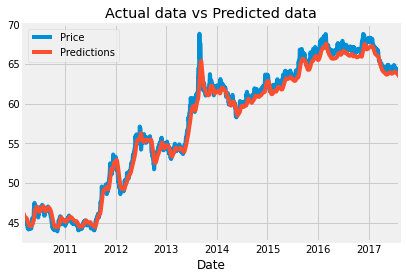

In [ ]:
valid.plot()
plt.title("Actual data vs Predicted data")
plt.show()

**Visualize from all the data's graph**

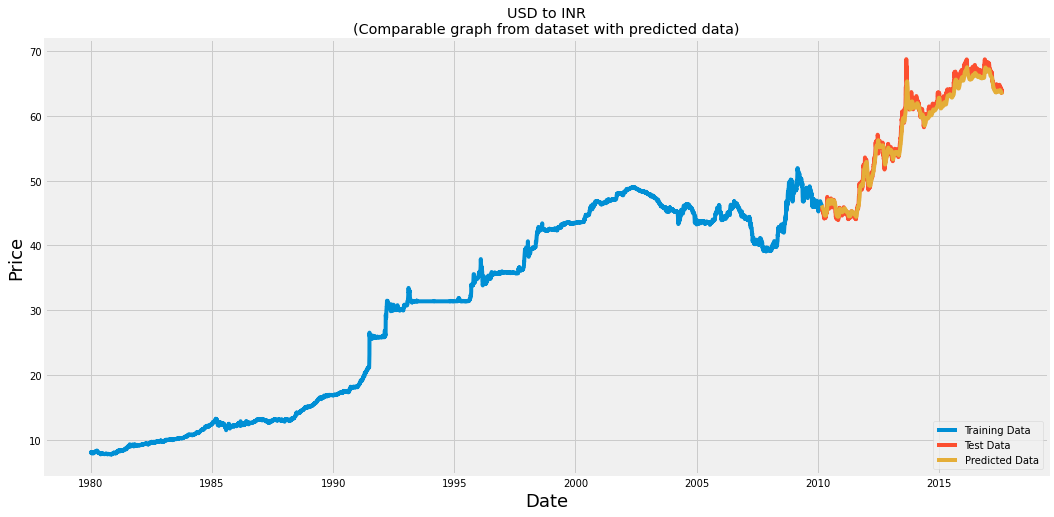

In [ ]:
plt.figure(figsize=(16,8))
plt.title("USD to INR\n(Comparable graph from dataset with predicted data)")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Training Data', 'Test Data', 'Predicted Data'], loc = "lower right")
plt.show()

##Predict Price from 50 days ago

In [ ]:
new_df = df.filter(['Price'])
NewValue = new_df[-Learning_data:].values
NewValue = scaler.transform(NewValue)
NewValue = np.array(NewValue)
NewValue = np.reshape(NewValue, (NewValue.shape[0], NewValue.shape[1], 1))
pred_Price = model.predict(NewValue)
pred_Price = scaler.inverse_transform(pred_Price)

print(pred_Price)

[[15.060283 ]
 [15.056675 ]
 [15.061116 ]
 [15.061393 ]
 [15.051125 ]
 [15.050846 ]
 [15.06389  ]
 [15.056397 ]
 [15.050292 ]
 [15.068608 ]
 [15.063058 ]
 [15.064723 ]
 [15.067222 ]
 [15.066666 ]
 [15.070829 ]
 [15.065279 ]
 [15.061393 ]
 [15.063613 ]
 [15.066388 ]
 [15.073881 ]
 [15.071662 ]
 [15.084148 ]
 [15.081096 ]
 [15.081651 ]
 [15.077488 ]
 [15.0719385]
 [15.063613 ]
 [15.068608 ]
 [15.063613 ]
 [15.06278  ]
 [15.060782 ]
 [15.056397 ]
 [15.054788 ]
 [15.052235 ]
 [15.058063 ]
 [15.058618 ]
 [15.059173 ]
 [15.058618 ]
 [15.056952 ]
 [15.044186 ]
 [15.04363  ]
 [15.048349 ]
 [15.04252  ]
 [15.016982 ]
 [15.020868 ]
 [15.019203 ]
 [15.028363 ]
 [15.020146 ]
 [15.029473 ]
 [15.046406 ]]
